# Creating Final Maps Visualizing Analysis Output
This code takes the modified low vegetation value and plots it using the pre-created grid shapefile. This shapefile is then clipped by the watershed shapefile and plotted over contextily maps. 

In [1]:
#Loading the packages I need
import cartopy.crs as ccrs                # import cartopy's CRS functions
import cartopy.feature as cfeature        # import cartopy's mapping features 
import matplotlib.pyplot as plt           # import matplotlib pyplot
import pandas as pd                       # import pandas 
import csv                
import geopandas as gpd
import contextily as ctx
import os
import rasterio as rio
import rioxarray as rxr

%matplotlib inline
%config Completer.use_jedi = False

In [2]:
#loading shapefiles
swanriverbuffer = gpd.read_file('K:\geog250\PythonSWR/Shapefiles/water_linear_flow_2.shp')
grid = gpd.read_file("K:\geog250\PythonSWR/gridtest5.shp")
display(grid)

#loading csv file
griddata = "K:\geog250\PythonSWR/griddatabayesgwr4.csv"
df = pd.read_csv(griddata, delimiter=",", header=0)
display(df)

FID                                           geometry
0          0  POLYGON ((452913.687 6070115.762, 452913.687 6...
1          1  POLYGON ((452913.687 6070334.923, 452913.687 6...
2          2  POLYGON ((452913.687 6070554.083, 452913.687 6...
3          3  POLYGON ((452913.687 6070773.243, 452913.687 6...
4          4  POLYGON ((452913.687 6070992.404, 452913.687 6...
...      ...                                                ...
66555  66555  POLYGON ((498279.892 6139151.292, 498279.892 6...
66556  66556  POLYGON ((498279.892 6139370.452, 498279.892 6...
66557  66557  POLYGON ((498279.892 6139589.613, 498279.892 6...
66558  66558  POLYGON ((498279.892 6139808.773, 498279.892 6...
66559  66559  POLYGON ((498279.892 6140027.933, 498279.892 6...

[66560 rows x 2 columns]

Unnamed: 0    X.1      X    FID  ConiferCover  BareSoilCover  \
0               1      1   3913   3913           0.0       0.234375   
1               2      2  19803  19803           0.0       0.156250   
2               3      3  38532  38532           0.0       0.093750   
3               4      4  16495  16495           0.0       0.031250   
4               5      5  33566  33566           0.0       0.031250   
...           ...    ...    ...    ...           ...            ...   
66555       66556  66556  32001  32001           1.0       0.000000   
66556       66557  66557  32002  32002           1.0       0.000000   
66557       66558  66558  32003  32003           1.0       0.000000   
66558       66559  66559  32307  32307           1.0       0.000000   
66559       66560  66560  32308  32308           1.0       0.000000   

       DecidCover   N                                        Coordinates  \
0        0.312500  64  3913    POINT (455653.192 6086224.052)\r\ndtyp...   
1        0.531250  64  19803    POINT (466392.052 6132247.739)\r\ndty...   
2        0.343750  64  38532    POINT (479322.516 6099154.517)\r\ndty...   
3        0.250000  64  16495    POINT (464200.448 6108578.414)\r\ndty...   
4        0.234375  64  33566    POINT (475815.950 6132905.220)\r\ndty...   
...           ...  ..                                                ...   
66555    0.000000   0  32001    POINT (474939.308 6070444.503)\r\ndty...   
66556    0.000000   0  32002    POINT (474939.308 6070663.663)\r\ndty...   
66557    0.000000   0  32003    POINT (474939.308 6070882.824)\r\ndty...   
66558    0.000000   0  32307    POINT (474939.308 6137507.589)\r\ndty...   
66559    0.000000   0  32308    POINT (474939.308 6137726.749)\r\ndty...   

       Modified.ConTree  Modified.AnthroSoil  Modified.LowVeg  GWR ConTree  \
0                 0.000            -0.052969         0.233031        0.000   
1                 0.000            -0.035312         0.250688        0.000   
2                 0.000            -0.021188         0.264813        0.000   
3                 0.000            -0.007063         0.278938        0.000   
4                 0.000            -0.007063         0.278938        0.000   
...                 ...                  ...              ...          ...   
66555            -0.116             0.000000         0.170000       -0.211   
66556            -0.116             0.000000         0.170000       -0.211   
66557            -0.116             0.000000         0.170000       -0.211   
66558            -0.116             0.000000         0.170000       -0.211   
66559            -0.116             0.000000         0.170000       -0.211   

       GWR AnthroSoil  GWR LowVeg  
0           -0.080156    0.239844  
1           -0.053437    0.266562  
2           -0.032063    0.287938  
3           -0.010688    0.309312  
4           -0.010688    0.309312  
...               ...         ...  
66555        0.000000    0.109000  
66556        0.000000    0.109000  
66557        0.000000    0.109000  
66558        0.000000    0.109000  
66559        0.000000    0.109000  

[66560 rows x 15 columns]

In [3]:
#Set Extents (lat/long)
entire_extent = [-115.679, -114.925, 55.449, 54.735]
delta_extent = [-115.527, -115.259, 55.418, 55.299]

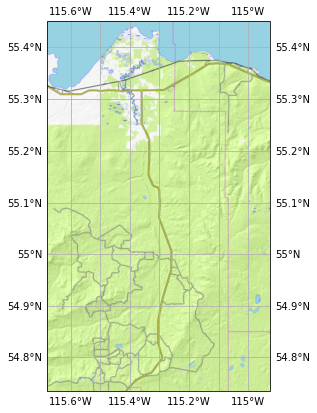

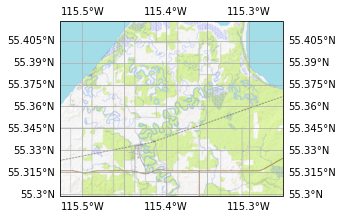

In [4]:
#Plot the extents to check
plt.figure(figsize=(4,10))
ax = plt.axes(projection=ccrs.Mercator.GOOGLE) #addes axes
ax.set_extent(entire_extent)
ax.gridlines(draw_labels=True)
ax.coastlines(resolution='10m')
ctx.add_basemap(ax, source=ctx.providers.OpenTopoMap, attribution=False)  # use OpenTopoMap web tiles.

plt.figure(figsize=(4,10))
ax = plt.axes(projection=ccrs.Mercator.GOOGLE) #addes axes
ax.set_extent(delta_extent)
ax.gridlines(draw_labels=True)
ax.coastlines(resolution='10m')
ctx.add_basemap(ax, source=ctx.providers.OpenTopoMap, attribution=False)  # use OpenTopoMap web tiles.

In [5]:
#Change the crs to match
swanriverbuffer.crs
grid = grid.to_crs(4617)

In [6]:
#Clip the grid to water shapefile
#Clipping
grid_clipped = gpd.clip(grid, swanriverbuffer) 

In [7]:
#Merge griddata with grid shapefile
grid_plt = grid_clipped.merge(df, on="FID")

display(grid_plt)

FID                                           geometry  Unnamed: 0  \
0        692  POLYGON Z ((-115.72435 54.90236 0.00000, -115....       23266   
1        693  POLYGON Z ((-115.72435 54.90236 0.00000, -115....       23267   
2       1005  POLYGON Z ((-115.72068 54.88858 0.00000, -115....       23423   
3       1006  POLYGON Z ((-115.72072 54.89055 0.00000, -115....       23424   
4       1007  POLYGON Z ((-115.72072 54.89055 0.00000, -115....       23425   
...      ...                                                ...         ...   
19600  64456  POLYGON Z ((-115.04755 55.07001 0.00000, -115....       61864   
19601  64457  POLYGON Z ((-115.04755 55.07032 0.00000, -115....       61865   
19602  64774  POLYGON Z ((-115.04114 55.06607 0.00000, -115....       62182   
19603  64775  POLYGON Z ((-115.04411 55.06804 0.00000, -115....       62183   
19604  64776  POLYGON Z ((-115.04411 55.06826 0.00000, -115....       62184   

         X.1      X  ConiferCover  BareSoilCover  DecidCover  N  \
0      23266    692           0.0            0.0    0.647059  0   
1      23267    693           0.0            0.0    0.647059  0   
2      23423   1005           0.0            0.0    0.272727  0   
3      23424   1006           0.0            0.0    0.272727  0   
4      23425   1007           0.0            0.0    0.272727  0   
...      ...    ...           ...            ...         ... ..   
19600  61864  64456           0.0            0.0    0.600000  0   
19601  61865  64457           0.0            0.0    0.600000  0   
19602  62182  64774           0.0            0.0    0.600000  0   
19603  62183  64775           0.0            0.0    0.600000  0   
19604  62184  64776           0.0            0.0    0.600000  0   

                                             Coordinates  Modified.ConTree  \
0      692    POINT (453461.588 6081621.684)\r\ndtype...               0.0   
1      693    POINT (453461.588 6081840.844)\r\ndtype...               0.0   
2      1005    POINT (453680.748 6080087.561)\r\ndtyp...               0.0   
3      1006    POINT (453680.748 6080306.721)\r\ndtyp...               0.0   
4      1007    POINT (453680.748 6080525.882)\r\ndtyp...               0.0   
...                                                  ...               ...   
19600  64456    POINT (497074.509 6100031.158)\r\ndty...               0.0   
19601  64457    POINT (497074.509 6100250.319)\r\ndty...               0.0   
19602  64774    POINT (497293.670 6099592.838)\r\ndty...               0.0   
19603  64775    POINT (497293.670 6099811.998)\r\ndty...               0.0   
19604  64776    POINT (497293.670 6100031.158)\r\ndty...               0.0   

       Modified.AnthroSoil  Modified.LowVeg  GWR ConTree  GWR AnthroSoil  \
0                      0.0            0.286          0.0             0.0   
1                      0.0            0.286          0.0             0.0   
2                      0.0            0.286          0.0             0.0   
3                      0.0            0.286          0.0             0.0   
4                      0.0            0.286          0.0             0.0   
...                    ...              ...          ...             ...   
19600                  0.0            0.286          0.0             0.0   
19601                  0.0            0.286          0.0             0.0   
19602                  0.0            0.286          0.0             0.0   
19603                  0.0            0.286          0.0             0.0   
19604                  0.0            0.286          0.0             0.0   

       GWR LowVeg  
0            0.32  
1            0.32  
2            0.32  
3            0.32  
4            0.32  
...           ...  
19600        0.32  
19601        0.32  
19602        0.32  
19603        0.32  
19604        0.32  

[19605 rows x 16 columns]

In [8]:
#Change grid_plt shapefile to crs for contextily
grid_plt2 =grid_plt.to_crs(3857)

<Figure size 432x288 with 0 Axes>

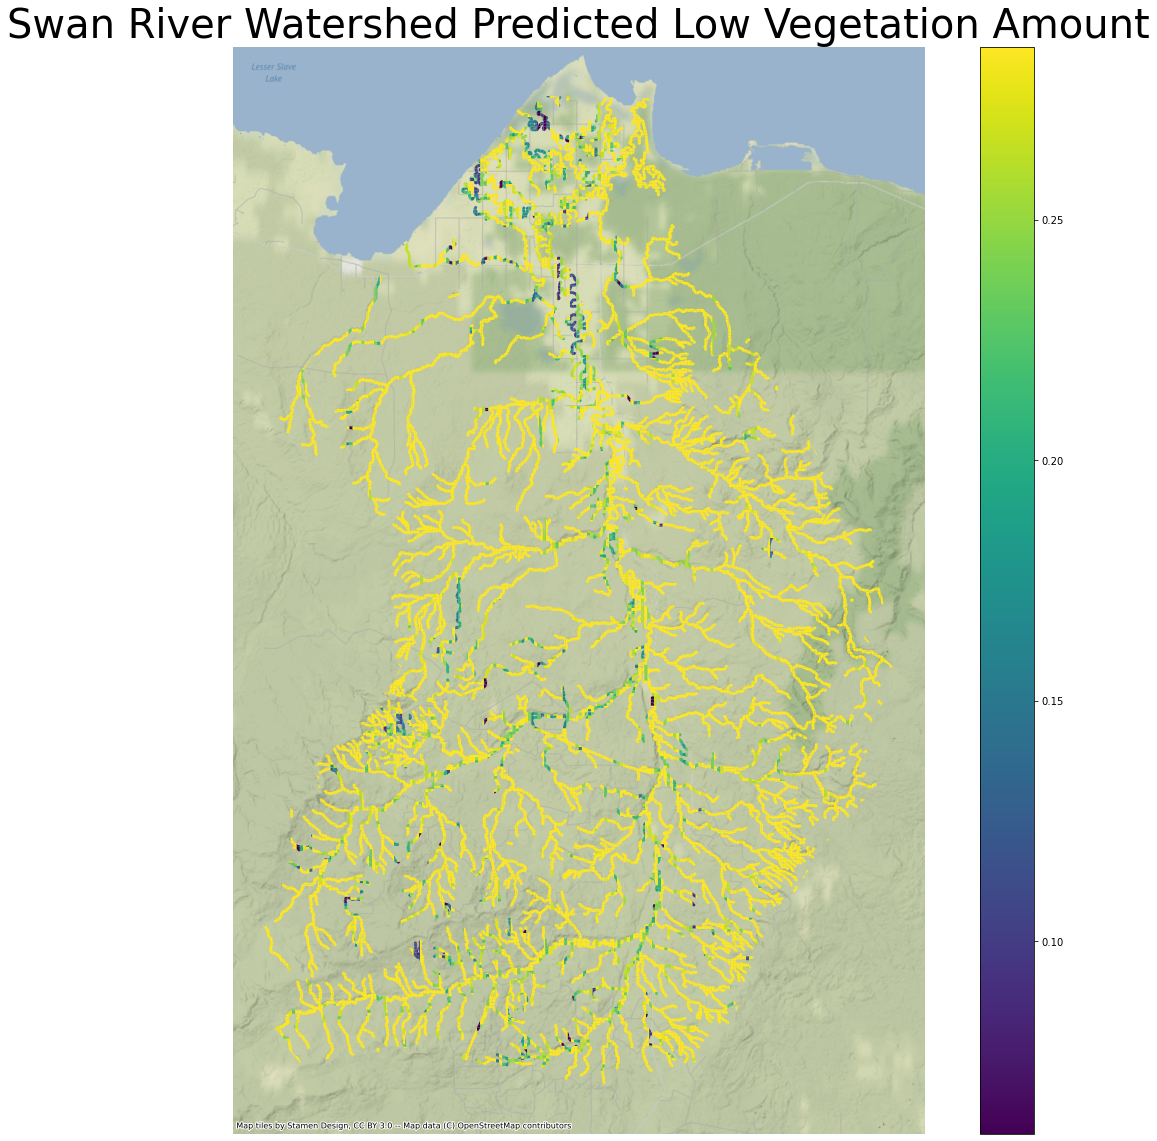

In [9]:
# create figure - entire extent with Bayesian analysis
fig = plt.figure()
ax = grid_plt2.plot(figsize=(20,20), column='Modified.LowVeg',legend=True, categorical=False)
ax.set_axis_off()
plt.title(label = 'Swan River Watershed Predicted Low Vegetation Amount',
         fontsize = 40)
ctx.add_basemap(ax)
plt.savefig('BayesEntire.jpg',dpi=800)

<Figure size 432x288 with 0 Axes>

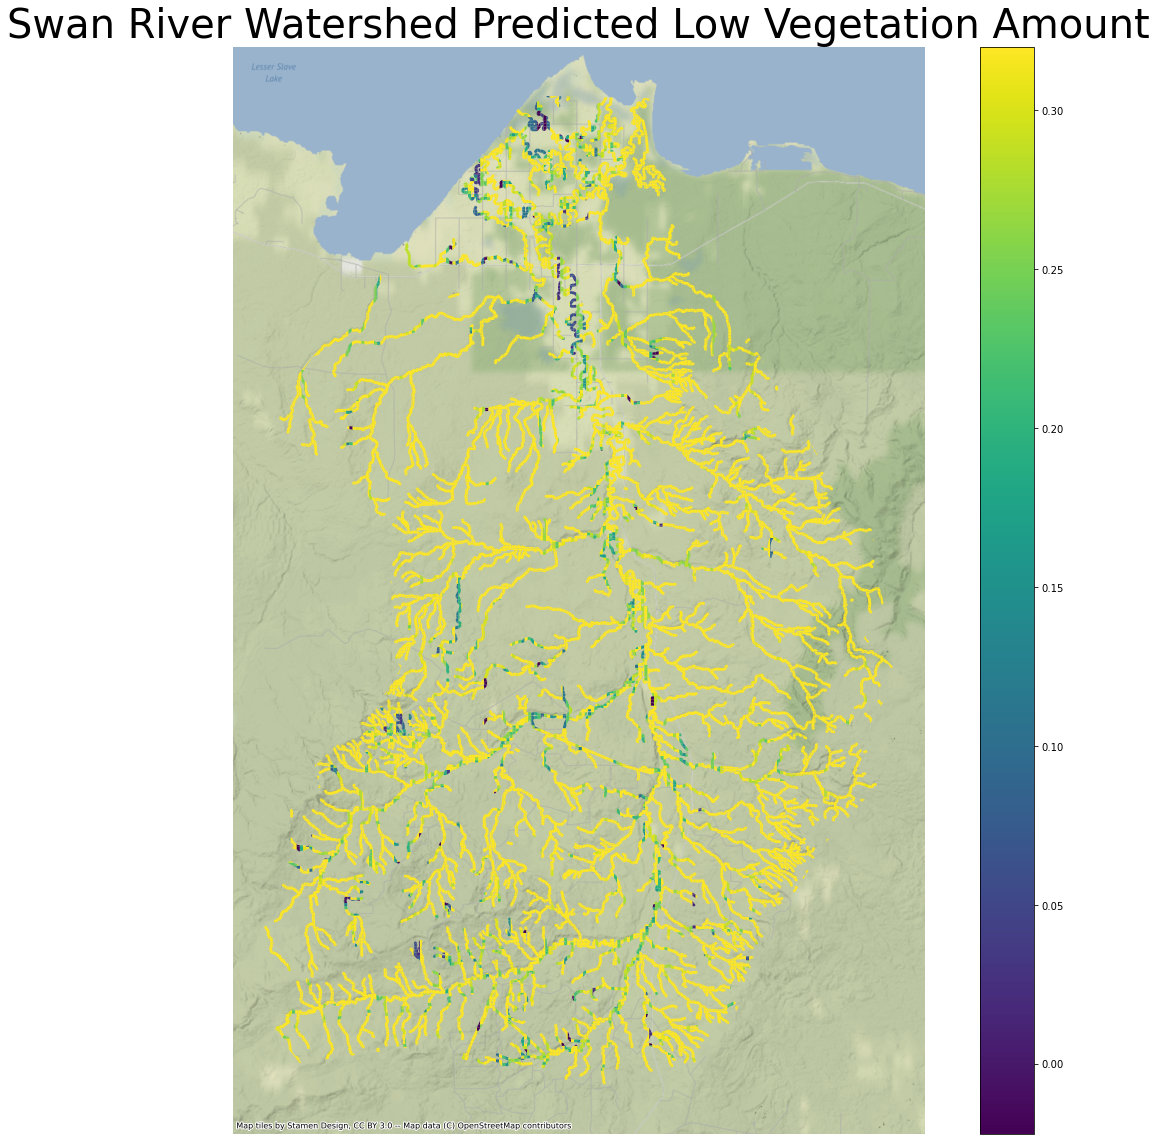

In [10]:
# create figure - entire extent with geographically weighted regression analysis
#ax.set_extent(delta_extent)
fig = plt.figure()
ax = grid_plt2.plot(figsize=(20,20), column='GWR LowVeg',legend=True, categorical=False)
ax.set_axis_off()
plt.title(label = 'Swan River Watershed <br> Predicted Low Vegetation Amount',
         fontsize = 40)
ctx.add_basemap(ax)
plt.savefig('GWREntire.jpg',dpi=800)

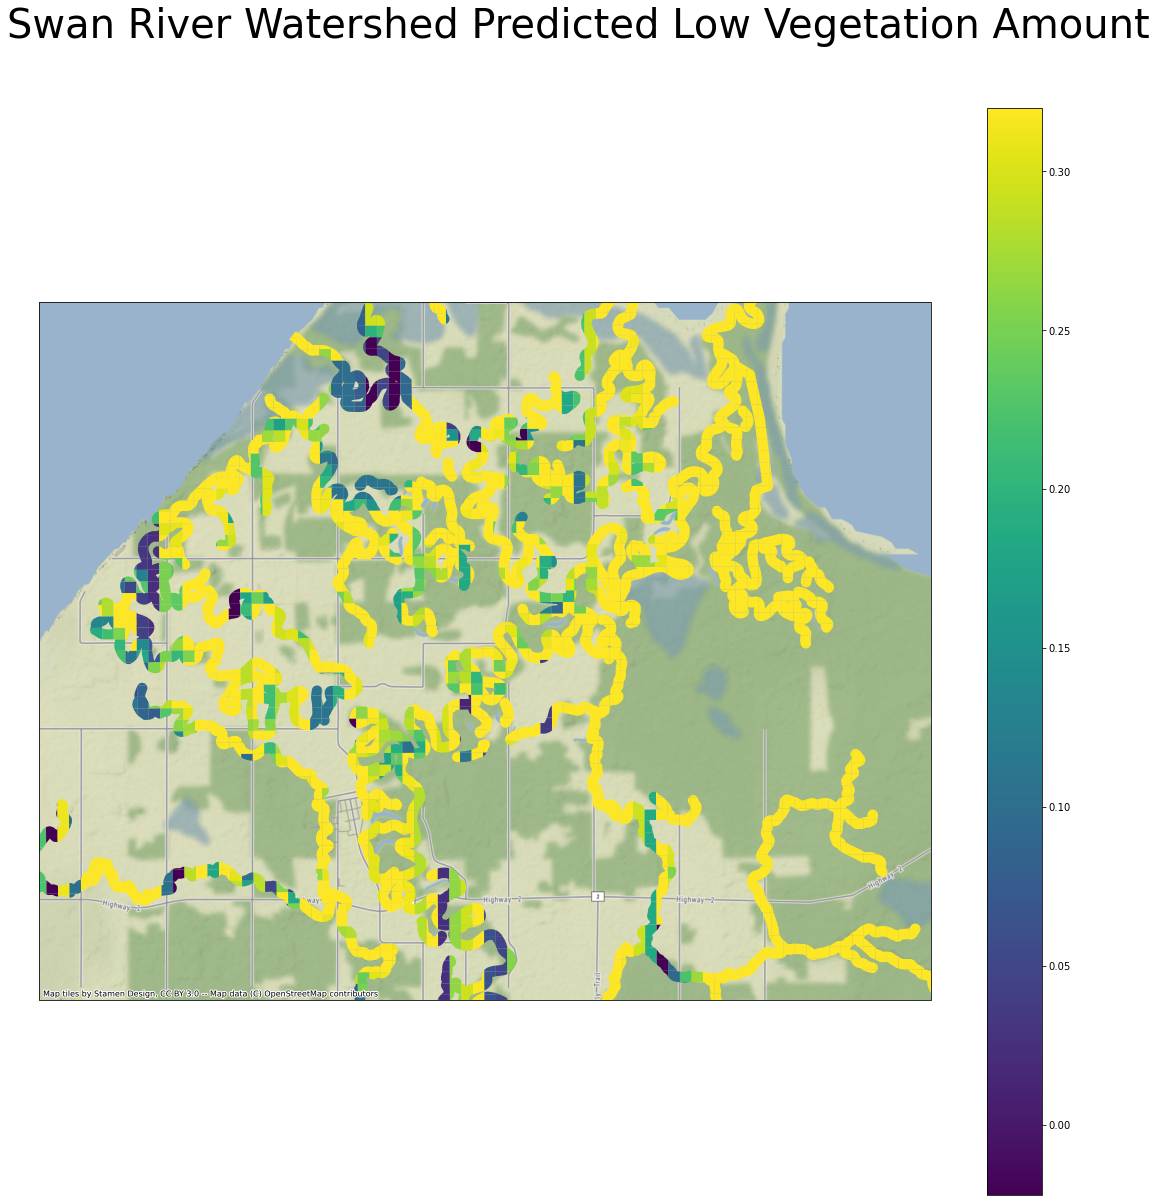

In [16]:
# create figure - delta extent of GWR
fig = plt.figure(figsize=(20,20))
ax = plt.axes(projection=ccrs.epsg(3857))
ax.set_extent(delta_extent)
grid_plt2.plot(ax=ax, column='GWR LowVeg',legend=True, categorical=False)
plt.suptitle("Swan River Watershed Predicted Low Vegetation Amount", fontsize=40, y=0.95)
ctx.add_basemap(ax)
plt.savefig('GWRDelta.jpg',dpi=800)

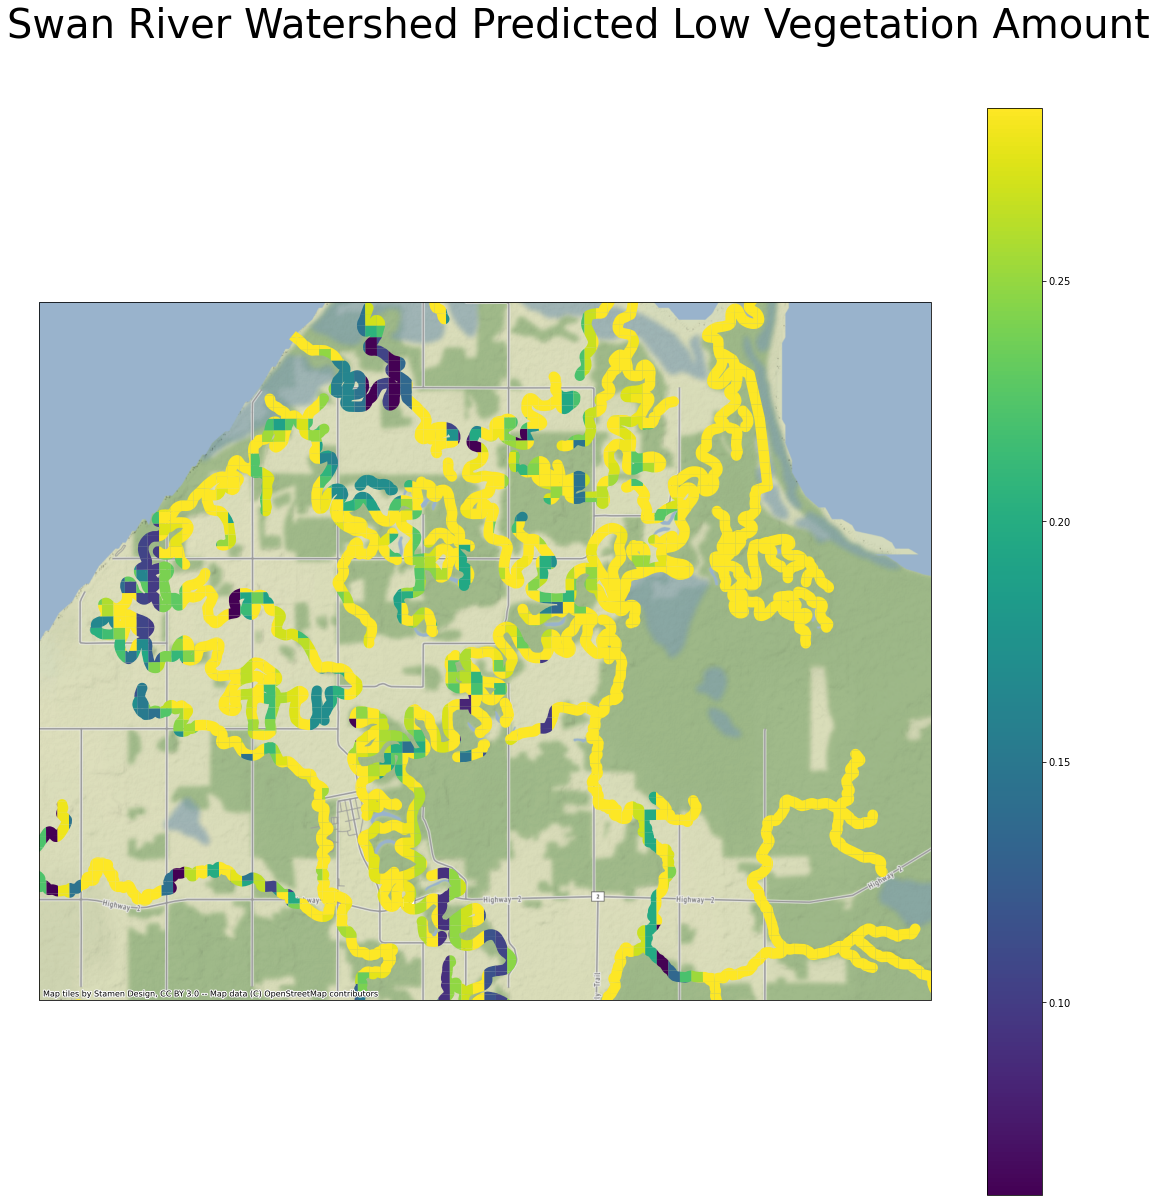

In [17]:
# create figure - delta extent of Bayesian
fig = plt.figure(figsize=(20,20))
ax = plt.axes(projection=ccrs.epsg(3857))
ax.set_extent(delta_extent)
grid_plt2.plot(ax=ax, column='Modified.LowVeg',legend=True, categorical=False)
plt.suptitle("Swan River Watershed Predicted Low Vegetation Amount", fontsize=40, y=0.95)
ctx.add_basemap(ax)
plt.savefig('BayesDelta.jpg',dpi=800)